<a href="https://colab.research.google.com/github/EkamjotKaur19/Neural-Networks/blob/main/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cats and dog classifier
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-04-05 15:25:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   152MB/s    in 0.4s    

2023-04-05 15:25:02 (152 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'train', 'vectorize.py']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.42.jpg', 'cat.870.jpg', 'cat.558.jpg', 'cat.745.jpg', 'cat.903.jpg', 'cat.620.jpg', 'cat.491.jpg', 'cat.632.jpg', 'cat.908.jpg', 'cat.577.jpg']
['dog.280.jpg', 'dog.878.jpg', 'dog.435.jpg', 'dog.169.jpg', 'dog.569.jpg', 'dog.651.jpg', 'dog.938.jpg', 'dog.356.jpg', 'dog.808.jpg', 'dog.34.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

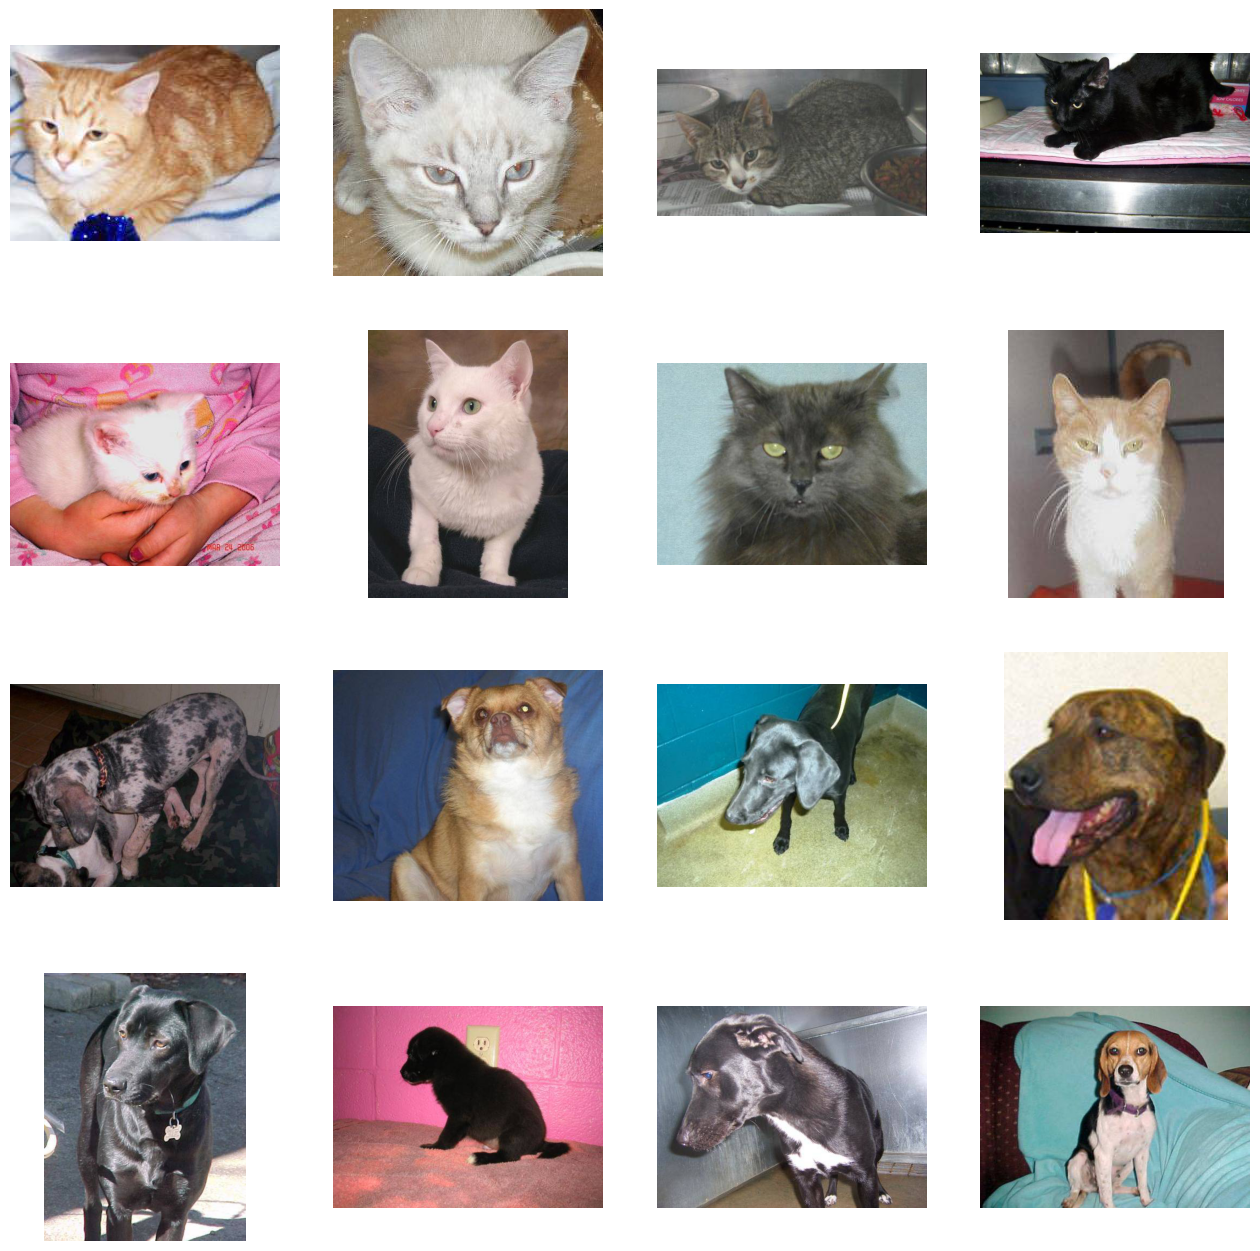

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16, (3,3),activation='relu', input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/225)
test_datagen=ImageDataGenerator(rescale=1.0/225)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator=train_datagen.flow_from_directory(validation_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150)
)

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )

Epoch 1/15
100/100 - 75s - loss: 0.7445 - accuracy: 0.5475 - val_loss: 0.6437 - val_accuracy: 0.5870 - 75s/epoch - 748ms/step
Epoch 2/15
100/100 - 72s - loss: 0.6501 - accuracy: 0.6345 - val_loss: 0.6127 - val_accuracy: 0.6640 - 72s/epoch - 725ms/step
Epoch 3/15
100/100 - 71s - loss: 0.6004 - accuracy: 0.6835 - val_loss: 0.6069 - val_accuracy: 0.6580 - 71s/epoch - 708ms/step
Epoch 4/15
100/100 - 73s - loss: 0.5228 - accuracy: 0.7395 - val_loss: 0.5729 - val_accuracy: 0.7040 - 73s/epoch - 726ms/step
Epoch 5/15
100/100 - 80s - loss: 0.4864 - accuracy: 0.7680 - val_loss: 0.5677 - val_accuracy: 0.7120 - 80s/epoch - 800ms/step
Epoch 6/15
100/100 - 73s - loss: 0.4366 - accuracy: 0.7880 - val_loss: 0.5517 - val_accuracy: 0.7230 - 73s/epoch - 729ms/step
Epoch 7/15
100/100 - 74s - loss: 0.3705 - accuracy: 0.8315 - val_loss: 0.6053 - val_accuracy: 0.7290 - 74s/epoch - 737ms/step
Epoch 8/15
100/100 - 72s - loss: 0.3018 - accuracy: 0.8655 - val_loss: 0.5929 - val_accuracy: 0.7400 - 72s/epoch - 721

In [22]:
import numpy as np

from google.colab import files
from keras.utils import load_img, img_to_array 

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.jpg to cat.jpg
1/1 [==============================] - 0s 34ms/step
[0.99999994]
cat.jpg is a dog


<Figure size 640x480 with 0 Axes>

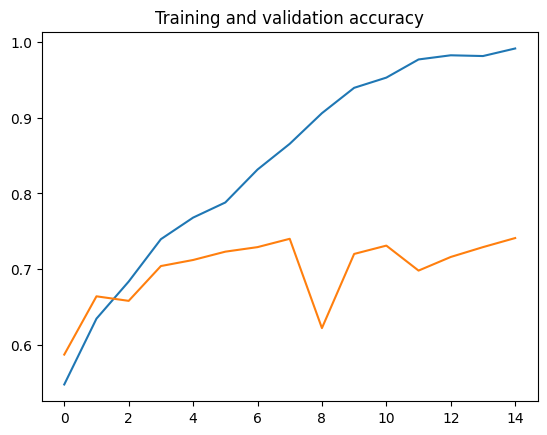

<Figure size 640x480 with 0 Axes>

In [23]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

Text(0.5, 1.0, 'Training and validation loss')

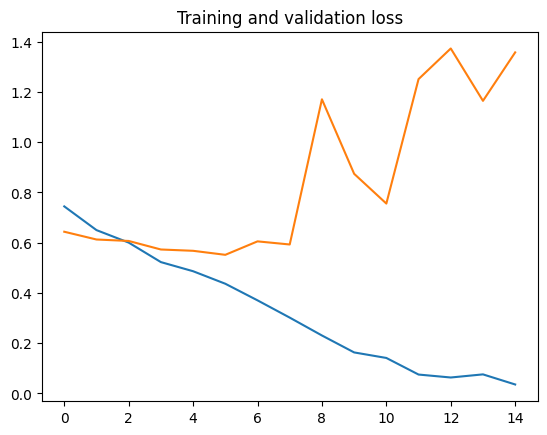

In [24]:
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )